In [10]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

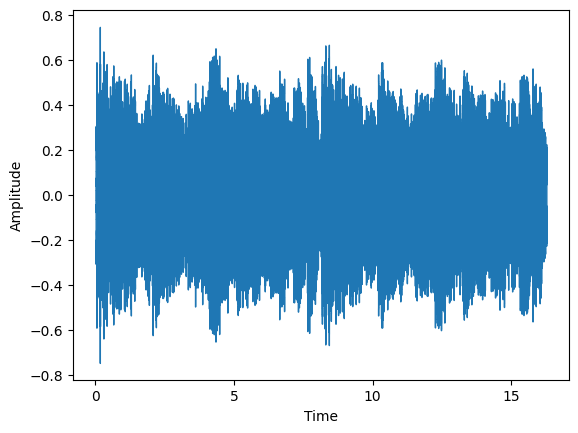

In [11]:
file = "TakeMe.wav"

# waveform
# Signal =  a 1-D array that Sr * T (duration of song) --> 22050 * 30 seconds
# Sr = sample rate that was specified or default
signal , sr = librosa.load(file, sr = 22050)
librosa.display.waveshow(signal, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


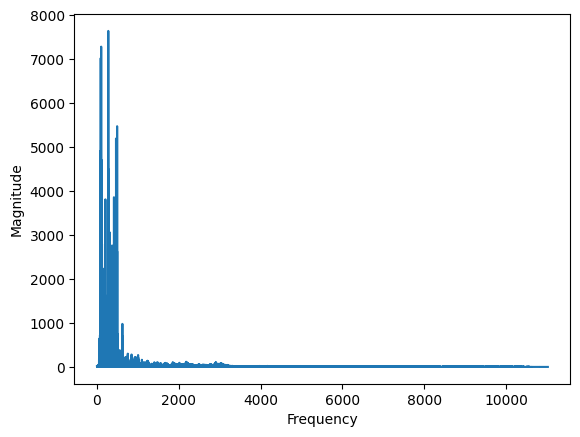

'\nImportant Note: \n\nThe graph is symmetrical. The half of the plot is the half o the sample rate.\nThe first half is bringing us the most important information.\nThat is why the above code has a freq / 2. \n\n'

In [19]:
# fft --> spectrum
fft = np.fft.fft(signal)

# ( 2 lines below) Get magnitude of values, contribution of each frequency to the sound
magnitude = np.abs(fft)
# Lin space gives evenly spaced numbers in an interval
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency) / 2)]
left_magnitude = magnitude[:int(len(frequency) / 2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

"""
Important Note: 

The graph is symmetrical. The half of the plot is the half o the sample rate.
The first half is bringing us the most important information.
That is why the above code has a freq / 2. 

"""

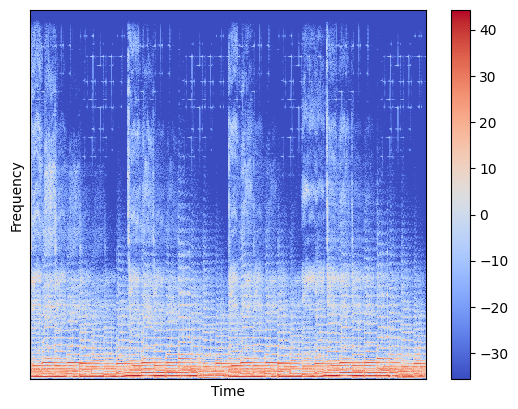

In [23]:
# stft --> Spectrogram

# number of samples per fft (window to analyze with a single fft)
n_fft = 2048
# Amount shifting each fft to the right (sliding the window)
hop_length = 512

# STFT Algorithm
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)

spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# You'll notice that a lot of the frequencies contribute very very low to the overall sound 
# The color bar is decibles. You use the amplitude to db method to convert to db


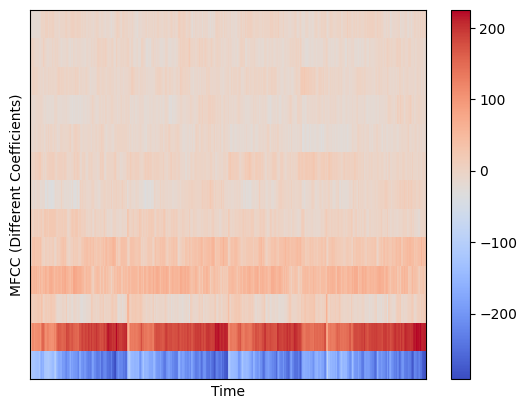

In [31]:
# MFCC's
MFCCs = librosa.feature.mfcc(y = signal, sr = sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC (Different Coefficients)")
plt.colorbar()
plt.show()

# This shows how the MFCC's are evolving all the time 
